<h1> Parkinson's Disease Dementia </h1>

This notebook is about analysing the decline in thinking and reasoning skills that develops in 
some people living with Parkinson’s at least a year after diagnosis. This is done using many attributes such as jitter,
shimmer, Human nuclear hormone receptors (NHR) and twenty two others in total. 

There are many algorithms with which this can be interpreted, I choose to do it with **Random Forest using first principle**.

Before implementing random forest from scratch, I analysed the data a bit using some graphs to have the better idea.

To analyse the predictive performance of the model I also implemented the Mean Squared Error.

This is a Binary classification task with label 'status' with values 0 and 1. 0 stands for healthy person and 1 for 
person diagnosed with parkinson's disease. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random
import math

In [2]:
df = pd.read_csv('parkinsons.data')

In [3]:
print(df.to_string())

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1   spread2        D2       PPE
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784          0.000070   0.00370   0.00554     0.01109       0.04374             0.426       0.02182       0.03130   0.02971      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968          0.000080   0.00465   0.00696     0.01394       0.06134             0.626       0.03134       0.04518   0.04368      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050          0.000090   0.00544   0.00781 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

(195, 24)

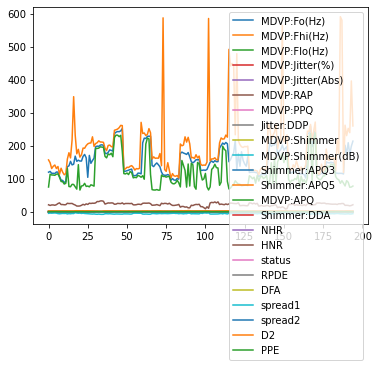

In [5]:
df.plot()
df.shape

In [6]:
parkinson=df[df['status']==0]
Healthy=df[df['status']==1]

In [7]:
parkinson.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.00000,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.028511,0.011483,24.67875,0.0,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
std,52.731067,96.727067,58.757070,0.002055,0.000015,0.001066,0.000943,0.003199,0.005544,0.057822,...,0.010368,0.019088,3.43454,0.0,0.092199,0.051346,0.642782,0.062982,0.310269,0.044820
min,110.739000,113.597000,74.287000,0.001780,0.000007,0.000920,0.001060,0.002760,0.009540,0.085000,...,0.014030,0.000650,17.88300,0.0,0.256570,0.626710,-7.964984,0.006274,1.423287,0.044539
25%,120.947500,139.413250,98.243750,0.002655,0.000010,0.001332,0.001480,0.003998,0.014475,0.129000,...,0.022060,0.004188,22.99325,0.0,0.372126,0.654291,-7.257665,0.120623,1.974217,0.094658
50%,198.996000,231.161500,113.938500,0.003355,0.000025,0.001625,0.001775,0.004875,0.016705,0.154000,...,0.026330,0.004825,24.99700,0.0,0.435368,0.682527,-6.826448,0.167356,2.129510,0.115118
75%,229.077000,251.239250,199.183000,0.004530,0.000030,0.001908,0.002228,0.005725,0.020210,0.189250,...,0.034540,0.009213,26.13925,0.0,0.507748,0.742284,-6.350146,0.193766,2.339487,0.147761
max,260.105000,592.030000,239.170000,0.013600,0.000080,0.006240,0.005640,0.018730,0.040870,0.405000,...,0.070080,0.107150,33.04700,0.0,0.663842,0.785714,-5.198864,0.291954,2.882450,0.252404


In [8]:
Healthy.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,...,147.000000,147.000000,147.000000,147.0,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.053027,0.029211,20.974048,1.0,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828
std,32.348050,88.339180,32.274358,0.005240,0.000037,0.003241,0.002998,0.009724,0.019970,0.207798,...,0.032391,0.044447,4.339143,0.0,0.101254,0.054786,0.970792,0.077809,0.375742,0.084271
min,88.333000,102.145000,65.476000,0.001680,0.000010,0.000680,0.000920,0.002040,0.010220,0.090000,...,0.013640,0.002310,8.441000,1.0,0.263654,0.574282,-7.120925,0.063412,1.765957,0.093193
25%,117.572000,133.776500,80.875500,0.004005,0.000030,0.002030,0.002190,0.006085,0.018295,0.168000,...,0.027400,0.008445,18.782000,1.0,0.439064,0.685569,-6.038300,0.199507,2.180933,0.170103
50%,145.174000,163.335000,99.770000,0.005440,0.000040,0.002840,0.003140,0.008530,0.028380,0.263000,...,0.044510,0.016580,21.414000,1.0,0.530529,0.726652,-5.440040,0.240875,2.439597,0.222716
75%,170.071000,207.160500,129.240000,0.007670,0.000060,0.004100,0.004360,0.012300,0.042525,0.394500,...,0.068455,0.027960,24.164500,1.0,0.604573,0.764868,-4.664067,0.303660,2.668479,0.274397
max,223.361000,588.518000,199.020000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,29.928000,1.0,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
x=df.loc[:,df.columns!='status'].values[:,1:]
x1=df.loc[:,df.columns!='status']
y=df.loc[:,'status'].values
y1=df.loc[:,'status']

array([[<AxesSubplot:title={'center':'MDVP:Fo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Fhi(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Flo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(%)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(Abs)'}>],
       [<AxesSubplot:title={'center':'MDVP:RAP'}>,
        <AxesSubplot:title={'center':'MDVP:PPQ'}>,
        <AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer(dB)'}>],
       [<AxesSubplot:title={'center':'Shimmer:APQ3'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ5'}>,
        <AxesSubplot:title={'center':'MDVP:APQ'}>,
        <AxesSubplot:title={'center':'Shimmer:DDA'}>,
        <AxesSubplot:title={'center':'NHR'}>],
       [<AxesSubplot:title={'center':'HNR'}>,
        <AxesSubplot:title={'center':'RPDE'}>,
        <AxesSubplot:title={'center':'DFA'}>,
        <AxesSubplot:title={'center':'spread1'}>

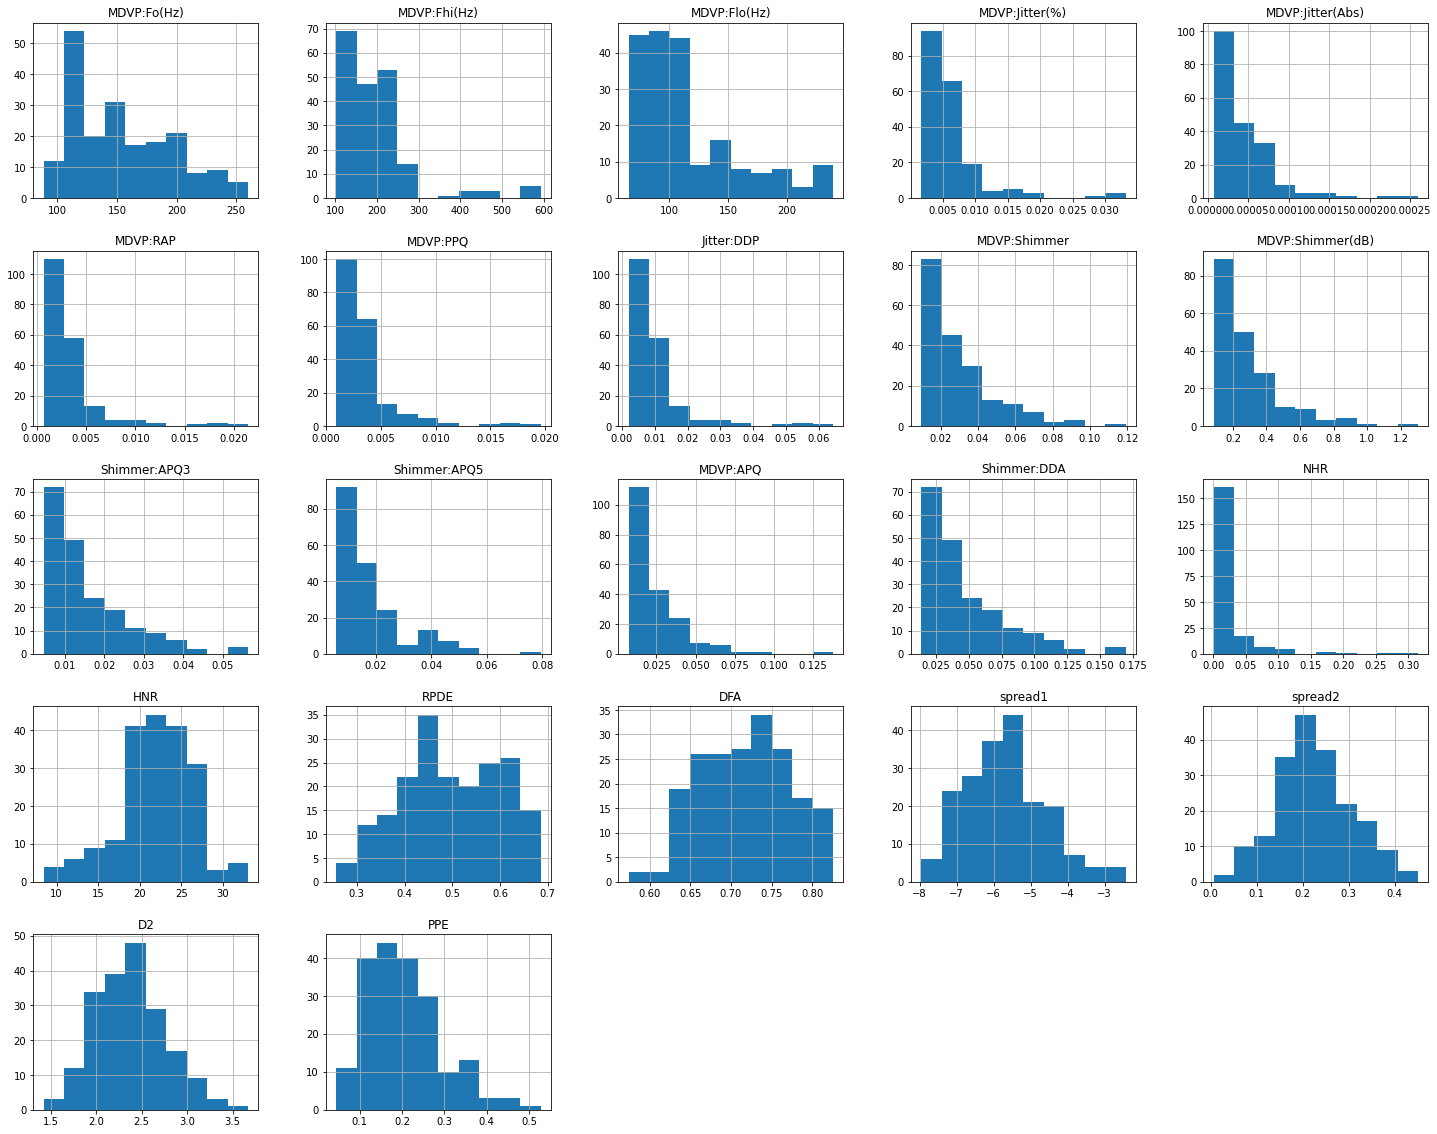

In [10]:
x1.hist(figsize=(25,20))

In [11]:
df.skew()

C:\Users\ammar\AppData\Local\Temp/ipykernel_20528/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NHR', ylabel='Density'>

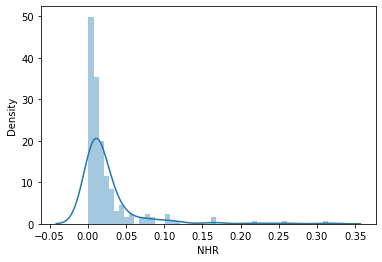

In [12]:
sns.distplot(df['NHR'])

In [13]:
df=df[df.NHR<=0.15]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NHR', ylabel='Density'>

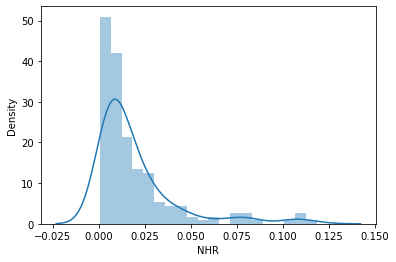

In [14]:
sns.distplot(df['NHR'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NHR', ylabel='Density'>

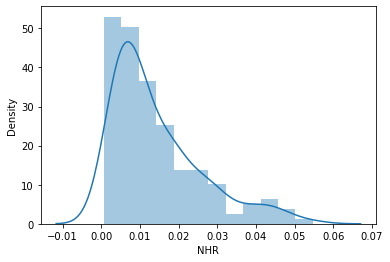

In [15]:
df=df[df.NHR<=0.06]
sns.distplot(df['NHR'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NHR', ylabel='Density'>

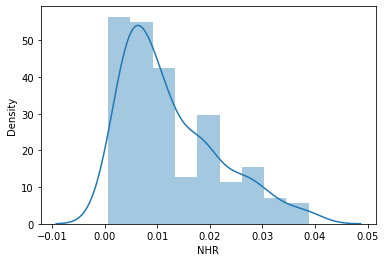

In [16]:
df=df[df.NHR<=0.04]
sns.distplot(df['NHR'])

In [17]:
df.skew()

C:\Users\ammar\AppData\Local\Temp/ipykernel_20528/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


MDVP:Fo(Hz)         0.703800
MDVP:Fhi(Hz)        2.694339
MDVP:Flo(Hz)        1.259126
MDVP:Jitter(%)      0.880192
MDVP:Jitter(Abs)    0.913797
MDVP:RAP            0.949318
MDVP:PPQ            1.573118
Jitter:DDP          0.948953
MDVP:Shimmer        1.294229
MDVP:Shimmer(dB)    1.392508
Shimmer:APQ3        1.320711
Shimmer:APQ5        1.656233
MDVP:APQ            1.251104
Shimmer:DDA         1.320615
NHR                 1.005854
HNR                 0.277909
status             -1.083619
RPDE               -0.022245
DFA                -0.076625
spread1             0.334377
spread2             0.132338
D2                  0.107106
PPE                 0.601292
dtype: float64

<AxesSubplot:>

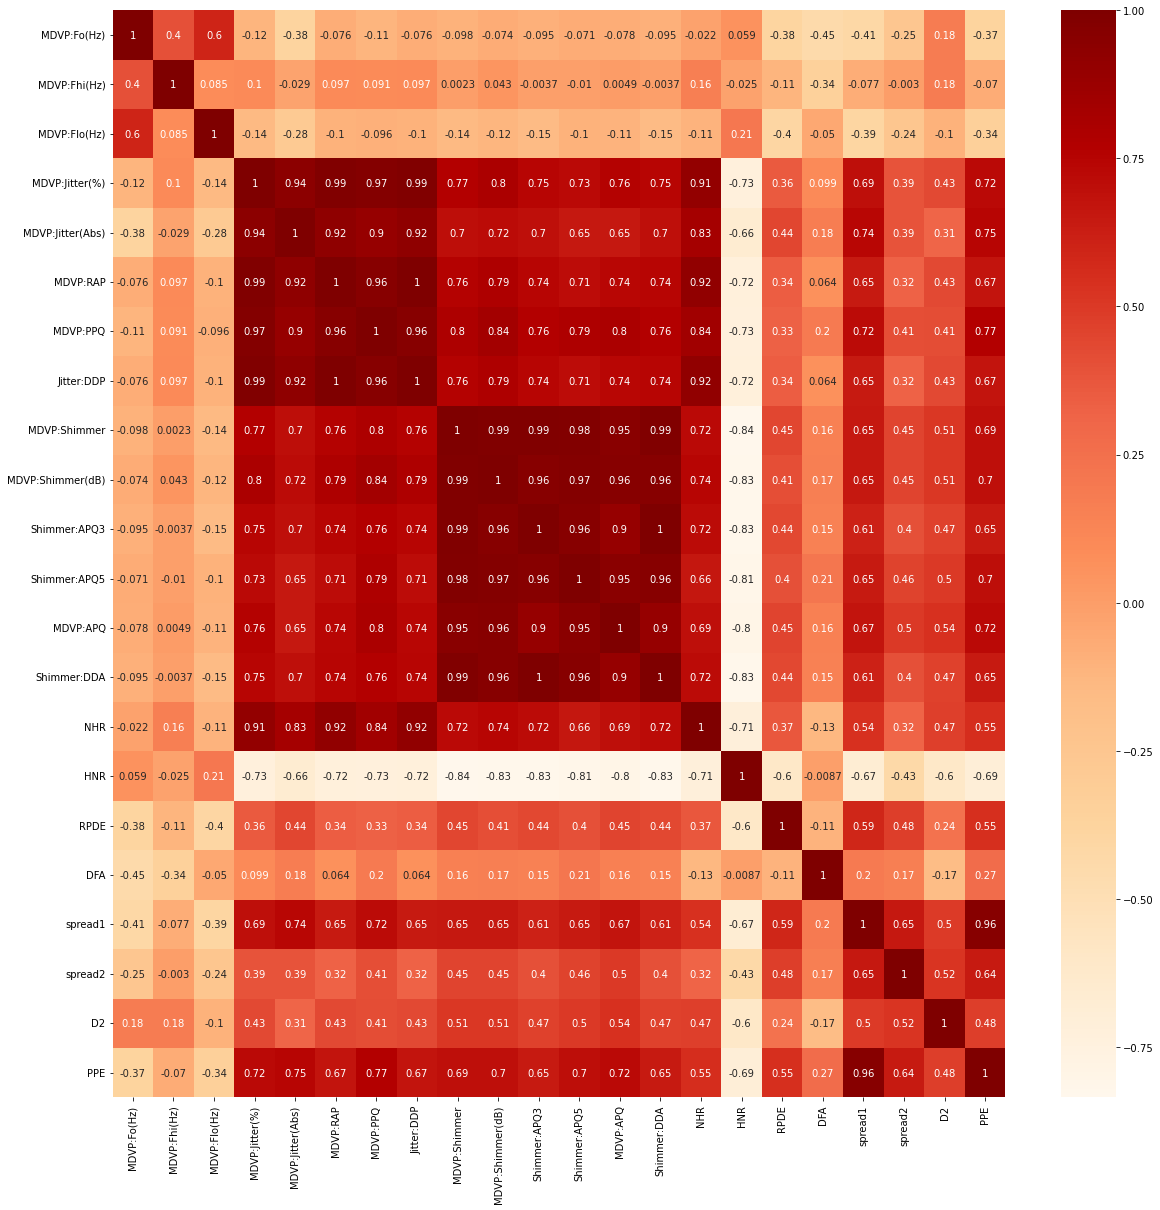

In [18]:
co1=x1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(co1,annot=True,cmap='OrRd')

In [19]:
scaler=MinMaxScaler((-1,1))
x1=scaler.fit_transform(x)

**Random Forest Implementation**

In [20]:
def avg(data,indx):
    if len(indx) == 0:	return 0.0
    return sum([ data[i][-1] for i in indx ]) / len(indx)

def rss(data,indx):
    if len(indx) == 0:	return 0.0
    mean = avg(data,indx)
    return sum([ pow( data[i][-1]-mean , 2.0 ) for i in indx ])


In [21]:
#Creating Decision Tree class which will have optimal split at each node 
#using recursive splitting 

class decisionTree:
    	
    def __init__(self,data,indx,depth):
        self.attr=0
        self.split=0
        self.L=0
        self.R=0
        if depth==0 or len(indx)==0:
            self.leaf = True
            self.prediction = avg(data,indx)
        elif len( set([data[i][-1] for i in indx]) ) == 1:
            self.leaf = True
            self.prediction = data[indx[0]][-1]
        else:
            self.leaf = False
            self.attr , self.split , self.L , self.R = self.generate(data,indx,depth)
                      
    def generate(self,data,indx,depth):
        p = len(data[indx[0]])-1
        labels = [ data[i][-1] for i in indx ]
        feature_subset = random.sample(range(p), k=math.ceil(p/3))
        opt = pow ( max(labels) - min(labels) , 2.0 ) * len(indx) + 1.0
        for feature_index in feature_subset:
            all_cuts = set([ data[i][feature_index] for i in indx ])
            for cut in all_cuts:
                yl = [ i for i in indx if data[i][feature_index]<=cut ]
                yr = [ i for i in indx if data[i][feature_index]>cut ]
                tmp = rss(data,yl) + rss(data,yr)
                if tmp < opt:
                    opt , self.attr , self.split, self.L , self.R = tmp , feature_index , cut , yl , yr
        return self.attr , self.split , decisionTree(data,self.L,depth-1) , decisionTree(data,self.R,depth-1)
    
    def predict(self,x):
        if self.leaf == True:	
            return self.prediction
        if (x[self.attr] <= self.split):	
            return self.L.predict(x)
        return self.R.predict(x)


In [22]:
#Splitting the dataset randomly into two equal test and train sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.5, random_state=520) 


In [23]:
'''
(a) Generate B = 100 bootstrapped training sets (BTS) from the training set.
''' 
#Function to generate B BTS of height h each from the training data
def getBDecisionTrees(B,h,train_data):
    sample_count = train_data.shape[0]
    random.seed(520)
    hatf = []	#this is used to store the decision trees generated
    
    for i in range(B):
        #Generating BTS
        #b_dataset = train_data.sample(sample_count, replace=True)
        b_dataset = random.choices(train_data, k=97)
        b_dataset = pd.DataFrame(b_dataset)
        b_dataset = b_dataset.drop_duplicates()
        b_dataset = b_dataset.sort_index()
        #making decision tree for each BTS
        tree_data = np.array(b_dataset)
        data_length = len(tree_data)
        all_indx = list(range(data_length))
        tree = decisionTree(tree_data,all_indx,h)
        #storing our decision tree in list of trees
        hatf.append(tree)
    return hatf


In [24]:
'''
b) Use each BTS to train for a decision tree of height h = 3.
'''  
B = 90
height = 3
# train_data = pd.DataFrame(data=X_train)
# train_data[data.columns[-1]] = y_train
#hatf = getBDecisionTrees(B,height,list(train_data))
train_data=X_train
hatf = getBDecisionTrees(B,height,train_data)


In [25]:
'''
c) Find the training MSE and test MSE.
'''
#Generic function to find MSE given actual labels and decision trees alongwith data
def getMSE(hatf, data, labels): 
    data=pd.DataFrame(data)
    #Getting predictions for training data from our BTS
    yhats = []
    for i in range(len(data)):
        X = data.iloc[[i]]    
        to_predict = np.array(X)[0]
        yhat = np.mean([hatf[j].predict(to_predict[:-1]) for j in range(len(hatf)) ])
        yhats.append(yhat)
           
    yhats = np.array(yhats)
    y = np.array(labels)
    diff = []
    for i in range(len(y)):
        true_value = y[i]
        pred_value = yhats[i]
        diff.append((true_value - pred_value)**2)
    mse = sum(diff)/len(diff)
    return mse

print('RESULT: B = 90, h = 3')

RESULT: B = 90, h = 3


In [26]:
train_mse = getMSE(hatf, train_data, y_train)
print('Training MSE:',train_mse)

Training MSE: 1.3486254660672414


In [28]:
#Finding Testing MSE
test_data = pd.DataFrame(data=X_test)
test_mse = getMSE(hatf, test_data, y_test)
print('Test MSE:',test_mse)

Test MSE: 1.2242119236412692


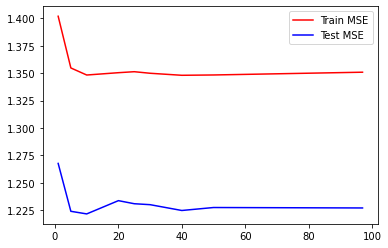

b_train_mses [1.4019820208808067, 1.3547884067881957, 1.3483409812529552, 1.350461216159075, 1.3513625713258706, 1.3499407810075539, 1.3480930201583996, 1.3483793286975572, 1.3509059288537233]
b_test_mses [1.2676514545247781, 1.2239608154179376, 1.221567150029352, 1.2336739675038588, 1.2308655476252566, 1.230000613439183, 1.2246973849115423, 1.2274059262632837, 1.2270057129181229]


In [29]:

'''
d)Repeat the above parts using different values of B and h. In your report,
plot the training MSE and test MSE as functions of B or/and h, and
discuss your observations.
'''

#The below code is written to produce results as presented in report
#(can be commented)

#Repeating the above parts for different values of B and height=3
B = [1, 5, 10,20, 25, 30, 40 ,50, 97]
B_train_mses = []
B_test_mses = []
for b in B:
    fhat = getBDecisionTrees(b,3,train_data)
    B_train_mses.append(getMSE(fhat, train_data, y_train))
    B_test_mses.append(getMSE(fhat, test_data, y_test))
    
plt.plot(B, B_train_mses, 'r', label = "Train MSE")
plt.plot(B, B_test_mses, 'b', label = "Test MSE")
plt.legend()
plt.show()

print('b_train_mses',B_train_mses)
print('b_test_mses',B_test_mses)

h_train_mses [1.362279369341781, 1.3614896375011092, 1.3512739145078192, 1.3525114917671117, 1.3511466606409135, 1.354885388024604, 1.3539656630110088, 1.3500346614088414]
h_test_mses [1.1752307561901567, 1.2162918194276575, 1.2277042539894778, 1.222216687357398, 1.2269615607577855, 1.2327724431063867, 1.2371310810134528, 1.2264267558508326]


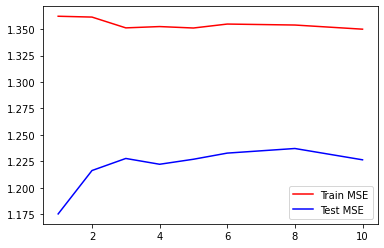

In [30]:
#Repeating the above parts for different values of h and B = 100
h = [1, 2, 3, 4, 5, 6, 8, 10]
h_train_mses = []
h_test_mses = []
for height in h:
    fhat = getBDecisionTrees(100,height,train_data)
    h_train_mses.append(getMSE(fhat, train_data, y_train))
    h_test_mses.append(getMSE(fhat, test_data, y_test))
    
print('h_train_mses',h_train_mses)
print('h_test_mses',h_test_mses)

plt.plot(h, h_train_mses, 'r', label = "Train MSE")
plt.plot(h, h_test_mses, 'b', label = "Test MSE")
plt.legend()